# STEP 1: Import ALL the things!

In [1]:
import numpy as np
import pandas as pd 
## dealing with categorical variables
from sklearn.preprocessing import LabelEncoder 
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_train = pd.read_csv('application_train.csv')
app_train.shape

(307511, 122)

In [3]:
app_test = pd.read_csv('application_test.csv')

# STEP 2: EDA
### 2a. What's the distribution of target column?

In [4]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

### 2b. Are there missing values?

In [5]:
df_na = pd.DataFrame(app_train.isna().sum())
df_na['percent'] = (df_na[0] / app_train.shape[0]) *100
df_na.sort_values(by="percent", ascending = False)

0    percent
COMMONAREA_MEDI              214865  69.872297
COMMONAREA_AVG               214865  69.872297
COMMONAREA_MODE              214865  69.872297
NONLIVINGAPARTMENTS_MODE     213514  69.432963
NONLIVINGAPARTMENTS_AVG      213514  69.432963
NONLIVINGAPARTMENTS_MEDI     213514  69.432963
FONDKAPREMONT_MODE           210295  68.386172
LIVINGAPARTMENTS_MODE        210199  68.354953
LIVINGAPARTMENTS_AVG         210199  68.354953
LIVINGAPARTMENTS_MEDI        210199  68.354953
FLOORSMIN_AVG                208642  67.848630
FLOORSMIN_MODE               208642  67.848630
FLOORSMIN_MEDI               208642  67.848630
YEARS_BUILD_MEDI             204488  66.497784
YEARS_BUILD_MODE             204488  66.497784
YEARS_BUILD_AVG              204488  66.497784
OWN_CAR_AGE                  202929  65.990810
LANDAREA_MEDI                182590  59.376738
LANDAREA_MODE                182590  59.376738
LANDAREA_AVG                 182590  59.376738
BASEMENTAREA_MEDI            179943  58.515956
BASEMENTAREA_AVG             179943  58.515956
BASEMENTAREA_MODE            179943  58.515956
EXT_SOURCE_1                 173378  56.381073
NONLIVINGAREA_MODE           169682  55.179164
NONLIVINGAREA_AVG            169682  55.179164
NONLIVINGAREA_MEDI           169682  55.179164
ELEVATORS_MEDI               163891  53.295980
ELEVATORS_AVG                163891  53.295980
ELEVATORS_MODE               163891  53.295980
...                             ...        ...
AMT_CREDIT                        0   0.000000
AMT_INCOME_TOTAL                  0   0.000000
FLAG_PHONE                        0   0.000000
LIVE_CITY_NOT_WORK_CITY           0   0.000000
REG_CITY_NOT_WORK_CITY            0   0.000000
TARGET                            0   0.000000
REG_CITY_NOT_LIVE_CITY            0   0.000000
LIVE_REGION_NOT_WORK_REGION       0   0.000000
REG_REGION_NOT_WORK_REGION        0   0.000000
REG_REGION_NOT_LIVE_REGION        0   0.000000
HOUR_APPR_PROCESS_START           0   0.000000
WEEKDAY_APPR_PROCESS_START        0   0.000000
REGION_RATING_CLIENT_W_CITY       0   0.000000
REGION_RATING_CLIENT              0   0.000000
FLAG_EMAIL                        0   0.000000
FLAG_CONT_MOBILE                  0   0.000000
ORGANIZATION_TYPE                 0   0.000000
FLAG_WORK_PHONE                   0   0.000000
FLAG_EMP_PHONE                    0   0.000000
FLAG_MOBIL                        0   0.000000
DAYS_ID_PUBLISH                   0   0.000000
DAYS_REGISTRATION                 0   0.000000
DAYS_EMPLOYED                     0   0.000000
DAYS_BIRTH                        0   0.000000
REGION_POPULATION_RELATIVE        0   0.000000
NAME_HOUSING_TYPE                 0   0.000000
NAME_FAMILY_STATUS                0   0.000000
NAME_EDUCATION_TYPE               0   0.000000
NAME_INCOME_TYPE                  0   0.000000
SK_ID_CURR                        0   0.000000

[122 rows x 2 columns]

### 2bi -- Options for handling missing data
* imputation 
* XGBoost

### 2c. How will we handle our categorical variables?
* One-hot encoding?
* Labels?

### 2d. What should we do with outliers?

# STEP 3: Find relationships!

In [6]:
correlations = app_train.corr()['TARGET'].sort_values()

### 3a. Correlations
#### Positive Correlations

In [7]:
correlations.tail(20)

OBS_30_CNT_SOCIAL_CIRCLE       0.009131
CNT_FAM_MEMBERS                0.009308
CNT_CHILDREN                   0.019187
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

#### Negative Correlations

In [8]:
correlations.head(20)

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
LIVINGAREA_MEDI              -0.032739
FLOORSMIN_MODE               -0.032698
TOTALAREA_MODE               -0.032596
ELEVATORS_MODE               -0.032131
LIVINGAREA_MODE              -0.030685
AMT_CREDIT                   -0.030369
Name: TARGET, dtype: float64

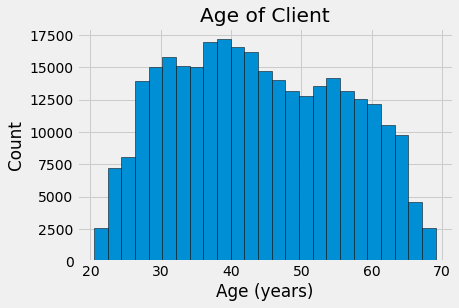

In [9]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

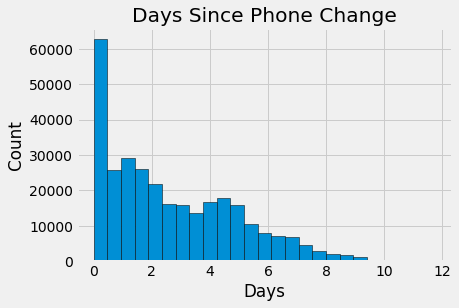

In [10]:
app_train['DAYS_LAST_PHONE_CHANGE'] = abs(app_train['DAYS_LAST_PHONE_CHANGE'])
plt.style.use('fivethirtyeight')
plt.hist(app_train['DAYS_LAST_PHONE_CHANGE'] / 365, edgecolor = 'k', bins = 25)
plt.title('Days Since Phone Change'); plt.xlabel('Days'); plt.ylabel('Count');

In [11]:
type(correlations.tail(20))

pandas.core.series.Series

In [12]:
high_corr = list(correlations.tail(20).axes[0])
high_corr

['OBS_30_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'FLAG_WORK_PHONE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'LIVE_CITY_NOT_WORK_CITY',
 'OWN_CAR_AGE',
 'DAYS_REGISTRATION',
 'FLAG_DOCUMENT_3',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_WORK_CITY',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'DAYS_BIRTH',
 'TARGET']

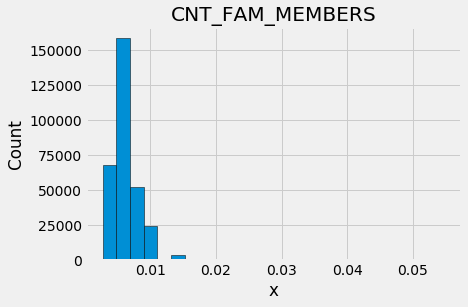

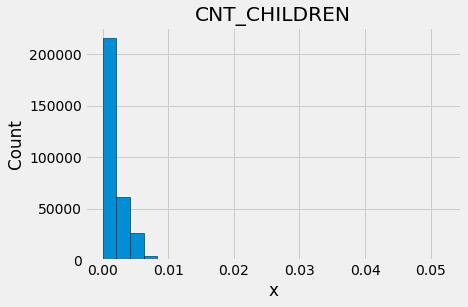

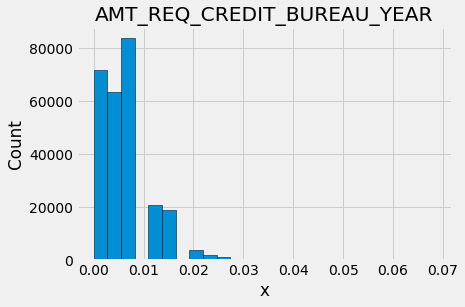

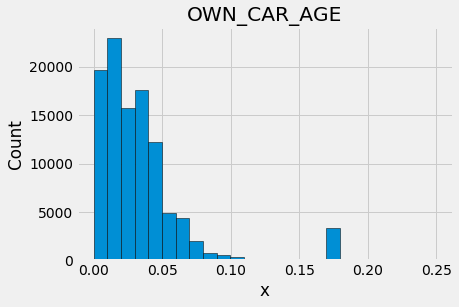

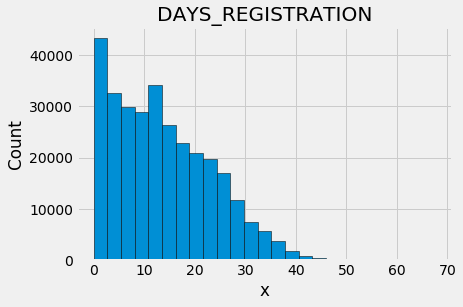

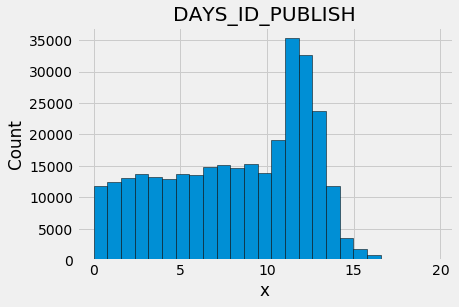

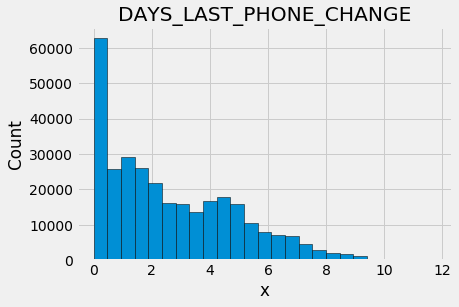

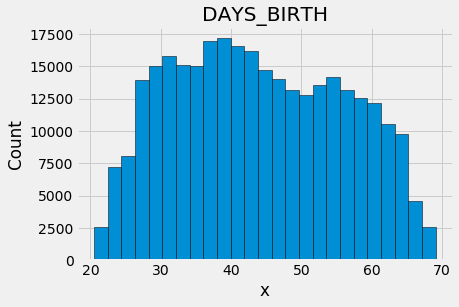

In [13]:
high_corr_for_graphs = ['CNT_FAM_MEMBERS',
 'CNT_CHILDREN',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'OWN_CAR_AGE',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE',
 'DAYS_BIRTH']

for col in high_corr_for_graphs:
#   print(app_train[col].value_counts())
#   print(app_train[col].dtype)
    df = app_train.copy()
    df[col] = abs(df[col])
    plt.style.use('fivethirtyeight')
    plt.hist(df[col] / 365, edgecolor = 'k', bins = 25)
    plt.title(col); plt.xlabel('x'); plt.ylabel('Count');
    plt.show()

### 3b. A closer look at age 
(using a Kernel Density Estimation Plot!!)

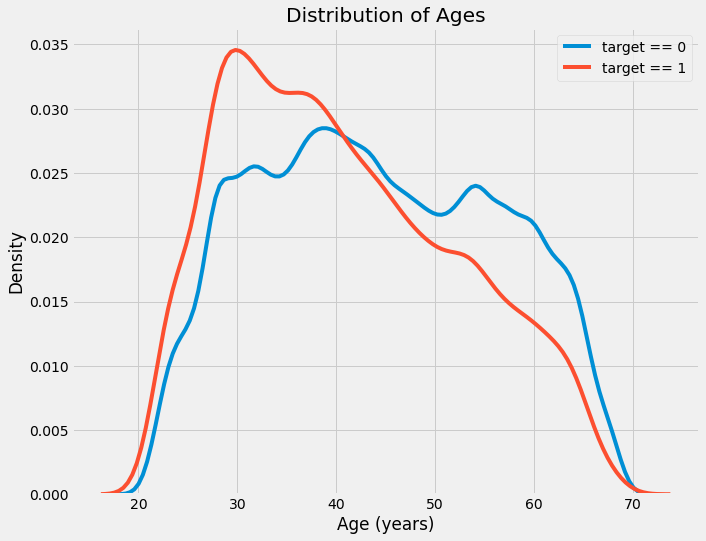

In [14]:

plt.figure(figsize = (10, 8))
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

#### Bin the age data

In [15]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 360

In [17]:
## This helps us get 20-25, 25-30 etc
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20,70, num = 11))
age_data.head(10)

TARGET  DAYS_BIRTH  YEARS_BIRTH  YEARS_BINNED
0       1        9461    26.280556  (25.0, 30.0]
1       0       16765    46.569444  (45.0, 50.0]
2       0       19046    52.905556  (50.0, 55.0]
3       0       19005    52.791667  (50.0, 55.0]
4       0       19932    55.366667  (55.0, 60.0]
5       0       16941    47.058333  (45.0, 50.0]
6       0       13778    38.272222  (35.0, 40.0]
7       0       18850    52.361111  (50.0, 55.0]
8       0       20099    55.830556  (55.0, 60.0]
9       0       14469    40.191667  (40.0, 45.0]

#### Group by the bin and get averages

In [18]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

TARGET    DAYS_BIRTH  YEARS_BIRTH
YEARS_BINNED                                     
(20.0, 25.0]  0.125012   8463.267882    23.509077
(25.0, 30.0]  0.111014  10030.386730    27.862185
(30.0, 35.0]  0.104224  11694.933937    32.485928
(35.0, 40.0]  0.090733  13529.460855    37.581836
(40.0, 45.0]  0.078907  15290.154690    42.472652
(45.0, 50.0]  0.075157  17081.219691    47.447832
(50.0, 55.0]  0.068611  18922.643421    52.562898
(55.0, 60.0]  0.056411  20676.450120    57.434584
(60.0, 65.0]  0.053481  22453.060703    62.369613
(65.0, 70.0]  0.042640  24028.811895    66.746700

#### Plot our newly binned data

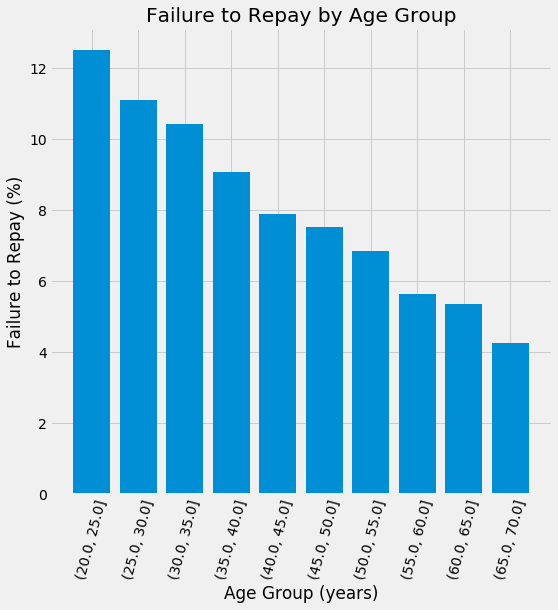

In [19]:
plt.figure(figsize=(8,8))
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# FIRST BIT OF INFORMATION FOR STAKEHOLDERS: 
"It appears that younger applicants are more likely to not repay their loans. Helping younger applicants with financial planning and guidance might help mitigate this" "

#### Exploring Negative Correlations

In [20]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919   -0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846    0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167    0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000    0.205478
DAYS_BIRTH   -0.078239      0.600610      0.091996      0.205478    1.000000

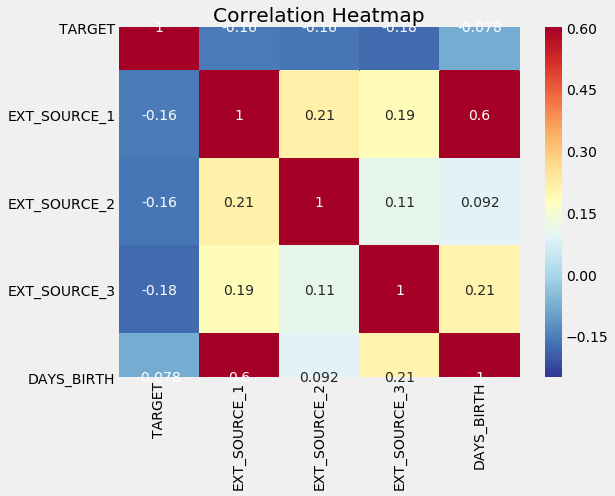

In [21]:
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

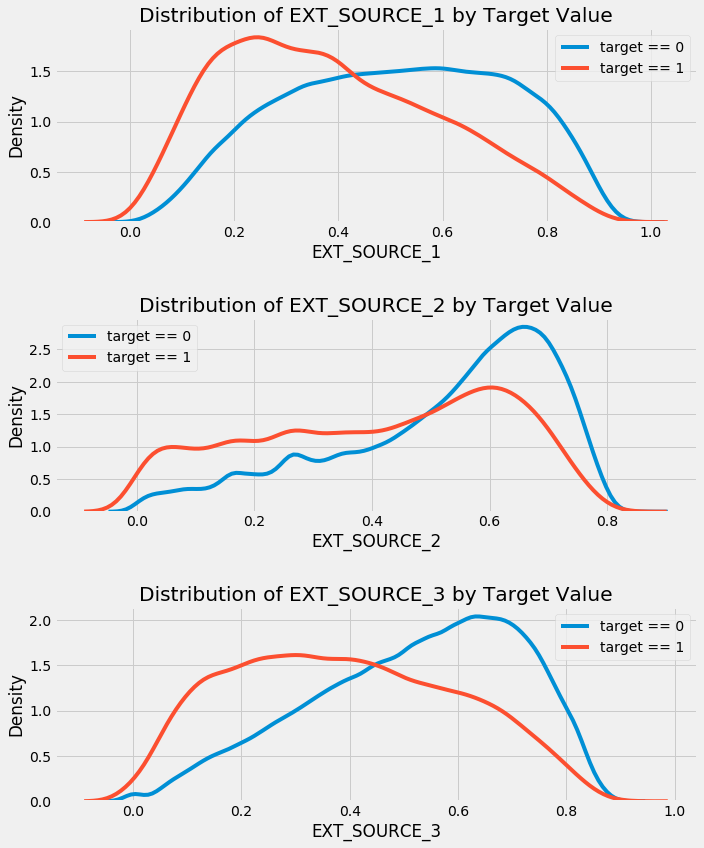

In [22]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### Use Pair Plots to see relationships between multiple pairs of variables

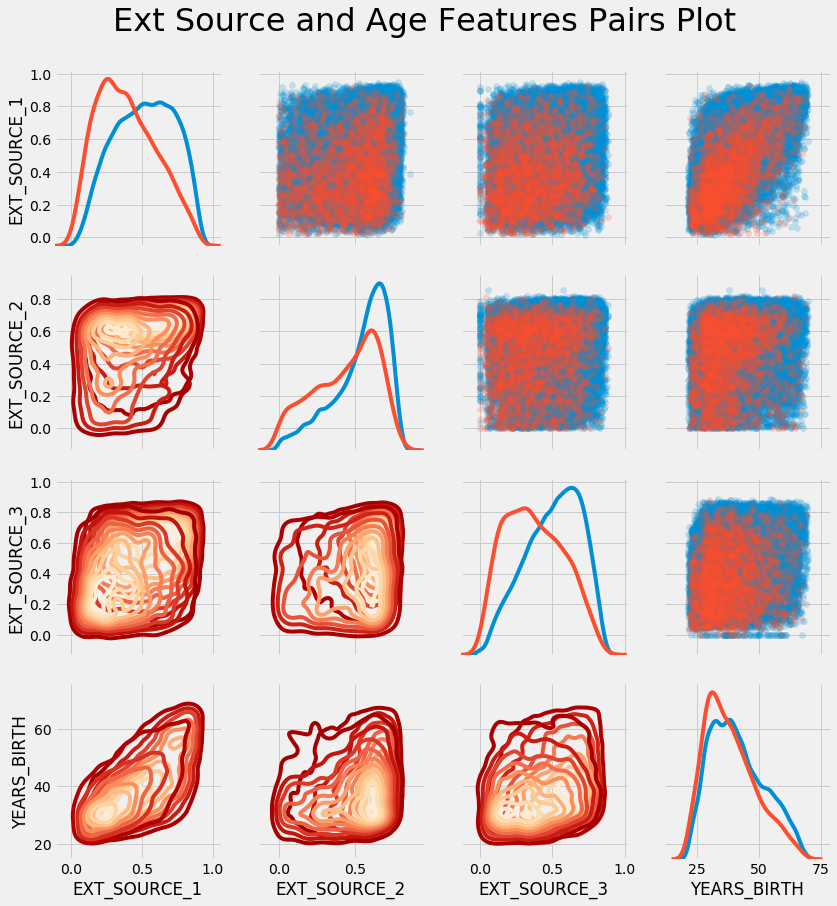

In [24]:
# Copy data, drop days_birth, add years_birth
# drop na and only get first 10k rows
# use corr_func to calc correlation coef b/t two cols

plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']
plot_data = plot_data.dropna().loc[:100000, :]

def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
# Upper is a scatter plot
# Diagonal is a histogram
# Bottom is density plot

grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])


grid.map_upper(plt.scatter, alpha = 0.2)
grid.map_diag(sns.kdeplot)
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

### RED =  LOAN NOT REPAID
### BLUE = LOAN REPAID

# FEATURE ENGINEERING

### Polynomial Features
Making features that are powers of existing features aka interaction terms 

1. Make a new DF for the polynomial features

In [31]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

2. Split target and features

In [32]:
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

3. Handle missing values (using sklearn Imputer)

In [33]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

4. Create Polynomial Object

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 3)


Polynomial Features shape:  (307511, 35)


5. Train the polynomial features & transform the features

In [34]:
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 35)


### YAY!! New features!!

In [37]:
poly_transformer.get_feature_names(input_features = 
                                   ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

### Let's see if these are correlated with the target

In [35]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [38]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)

Training data with polynomial features shape:  (307511, 156)
Testing data with polynomial features shape:   (48744, 156)


In [39]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

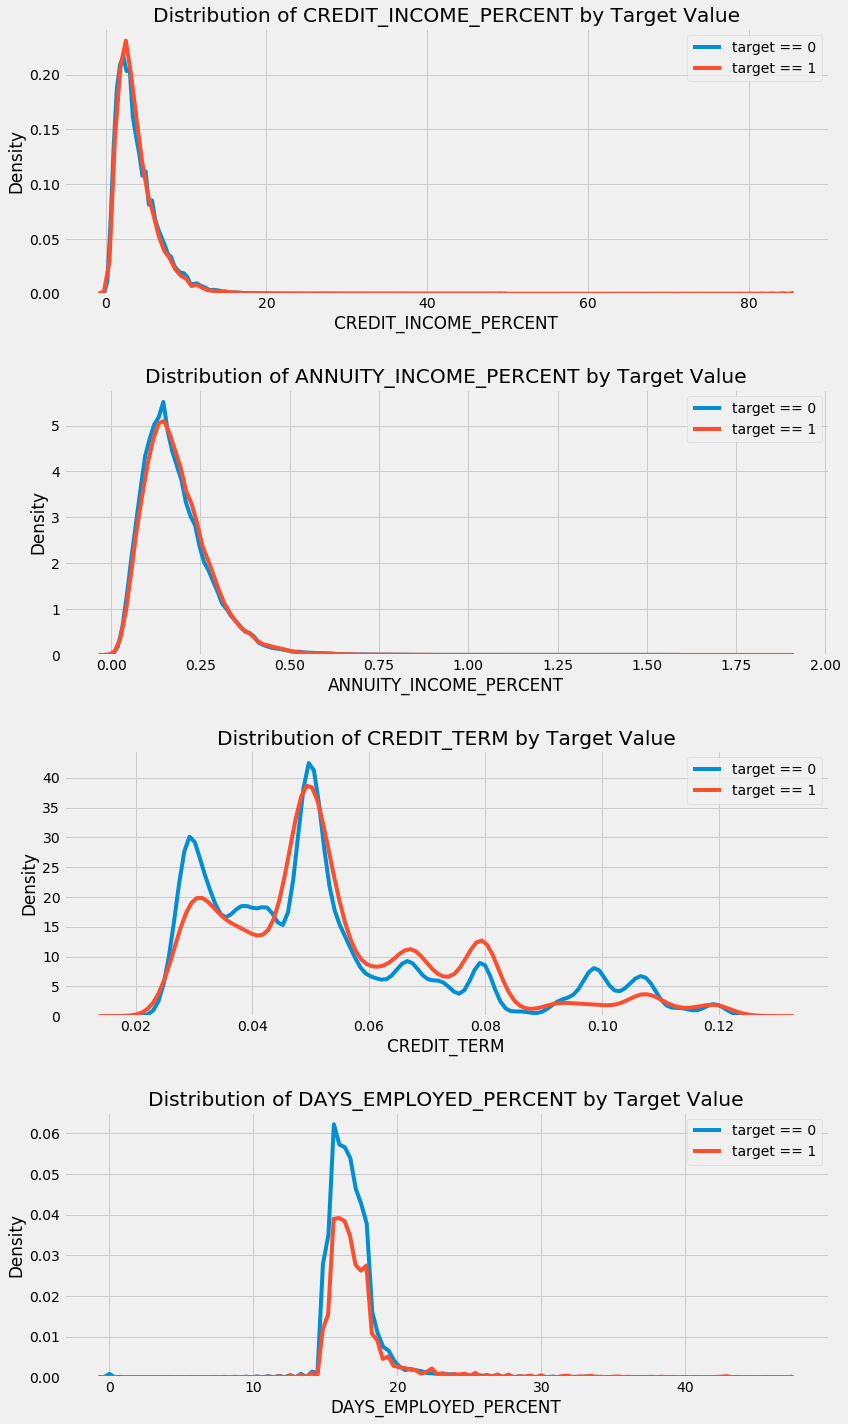

In [40]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)